In [12]:
# whole standard Data Science library
import pandas as pd
import numpy as np


# setting random seed to 7
np.random.seed(7)

#vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# selected functions from Data Science libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import spearmanr, pearsonr, f_oneway

#import project modules
import src.german_credit_acquire as gca
import src.german_evaluate as ev

import os


# libraries for convenience
pd.options.display.float_format = '{:,.3f}'.format

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

In [65]:
train, validate, test = gca.get_german_credit()

In [36]:
feature_list = ['age', 'sex', 'job', 'credit amount', 'duration']

In [126]:
categorical_variable_test = ev.ftest_df(train)
categorical_variable_test

,Potential_Feature,F-stat,Significance,Keep
0,housing,3.961,0.980,Yes
1,checking,28.380,1.000,Yes
2,savings,7.211,1.000,Yes


In [125]:
continuous_variable_test = ev.pearson_test_df(train, 'risk', feature_list)
continuous_variable_test

,Potential_Feature,Coefficient,P-Value,Significance,Keep
0,age,0.090,0.034,0.966,Yes
1,sex,0.075,0.075,0.925,No
2,job,-0.047,0.266,0.734,No
3,credit amount,-0.157,0.000,1.000,Yes
4,duration,-0.232,0.000,1.000,Yes


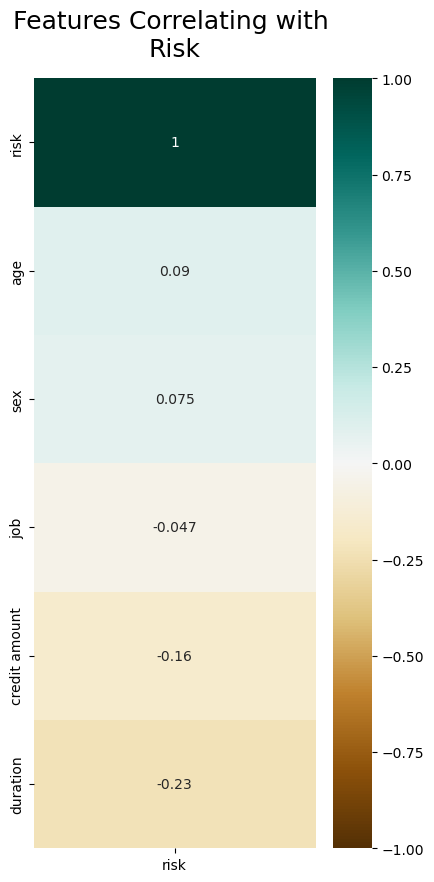

In [124]:
ev.correlate_viz(train, 'risk')

In [136]:
train['housing'].unique().to_list()

['own', 'rent', 'free']